In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot  as plt

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
x_train, x_test = x_train / 255.0, x_test / 255.0


In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt



In [5]:
model = models.Sequential([
    layers.Conv2D(filters = 32 , kernel_size = (3,3), activation = 'relu' , input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters = 64 , kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(512 , activation = 'relu'),
    layers.Dense(10 , activation = 'softmax')

    ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']

)

In [7]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.4267 - loss: 1.5779 - val_accuracy: 0.6375 - val_loss: 1.0479
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.6419 - loss: 1.0143 - val_accuracy: 0.6537 - val_loss: 1.0106
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7104 - loss: 0.8230 - val_accuracy: 0.7088 - val_loss: 0.8473
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7709 - loss: 0.6591 - val_accuracy: 0.6911 - val_loss: 0.9344
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8196 - loss: 0.5154 - val_accuracy: 0.7205 - val_loss: 0.8567
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8664 - loss: 0.3891 - val_accuracy: 0.7189 - val_loss: 0.9308
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9099 - loss: 0.2702 - val_accuracy: 0.7141 - val_loss: 1.0331
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9371 - loss: 0.19

In [8]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7124 - loss: 1.4489


[1.4602091312408447, 0.7109000086784363]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


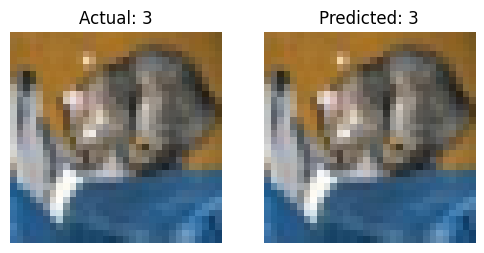

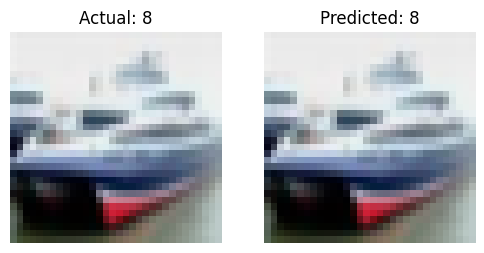

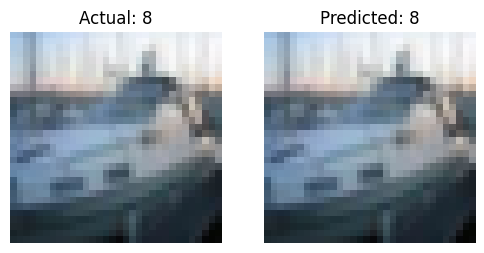

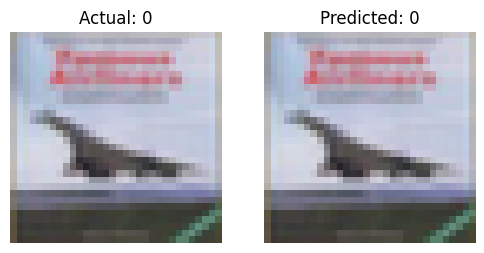

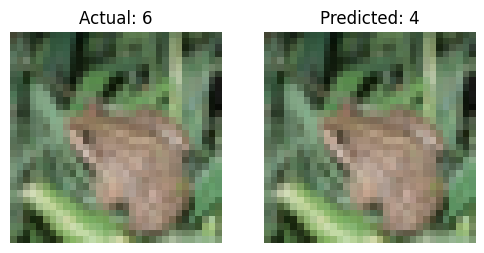

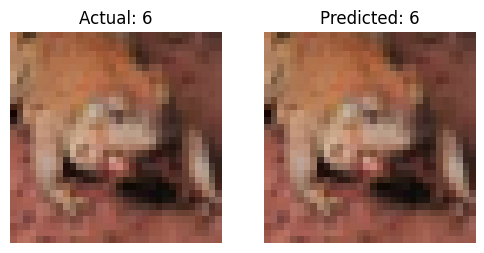

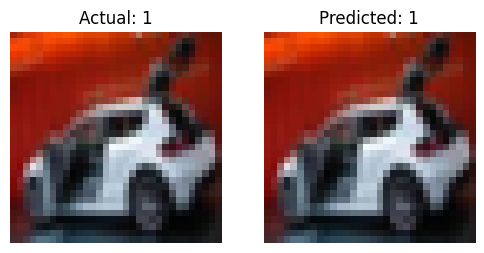

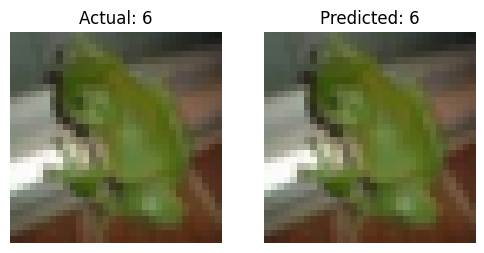

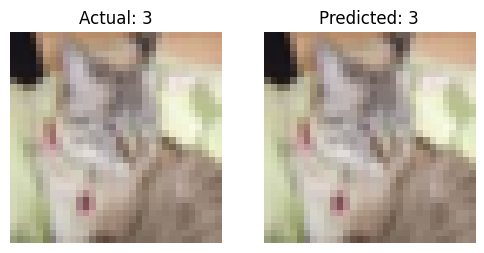

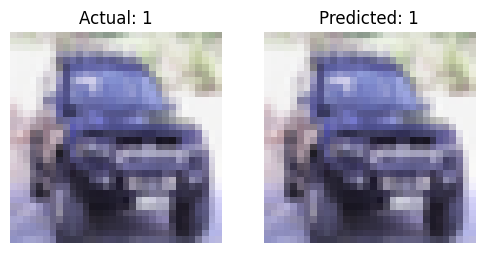

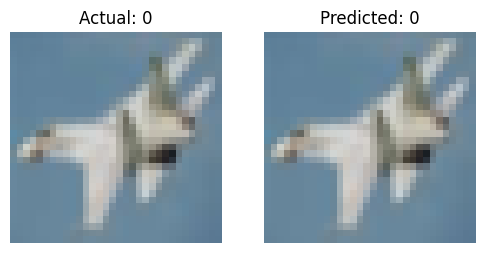

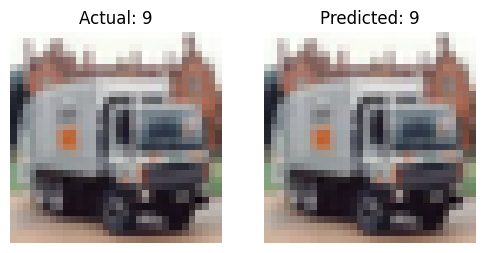

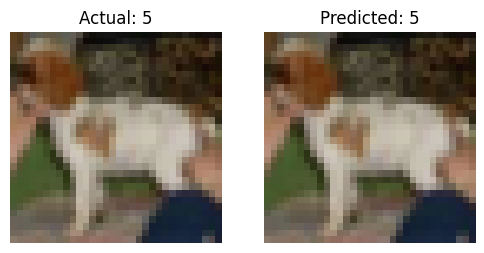

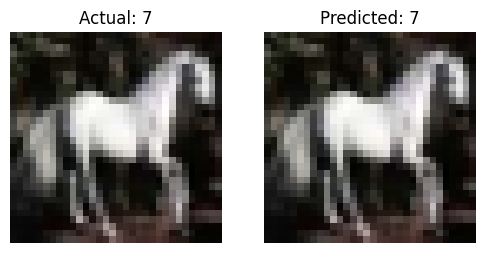

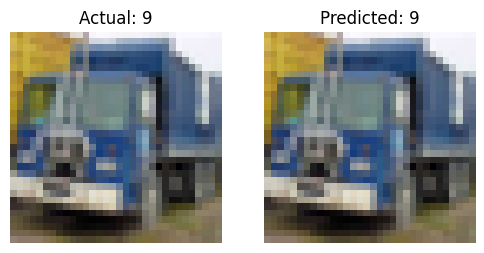

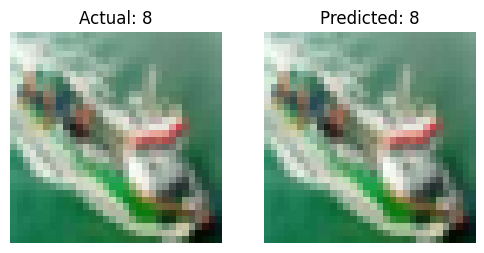

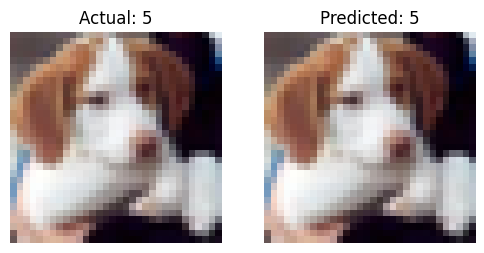

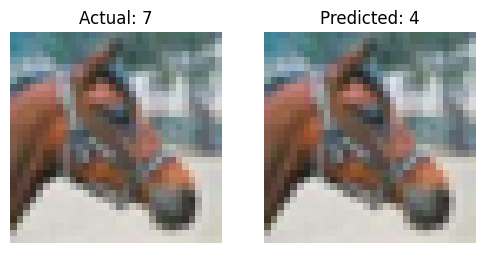

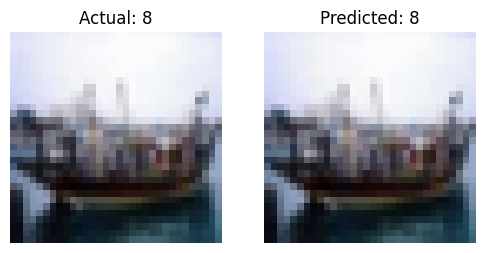

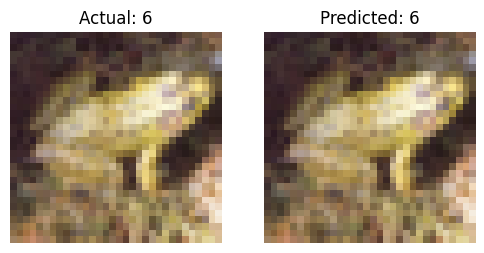

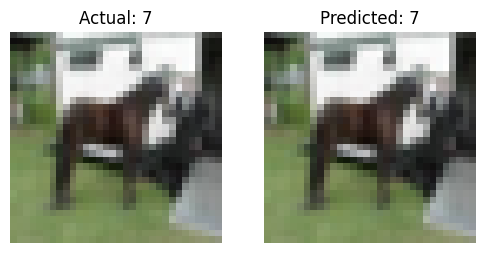

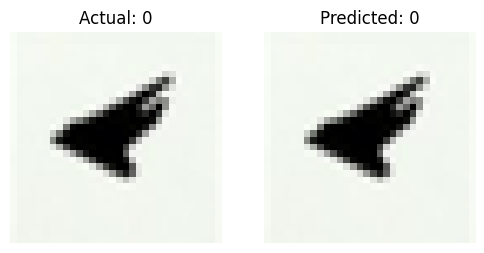

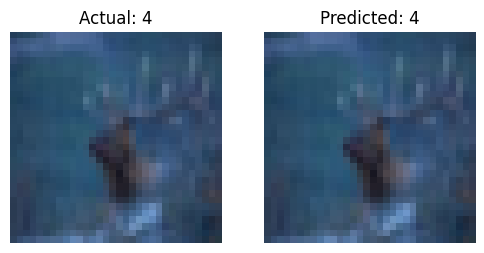

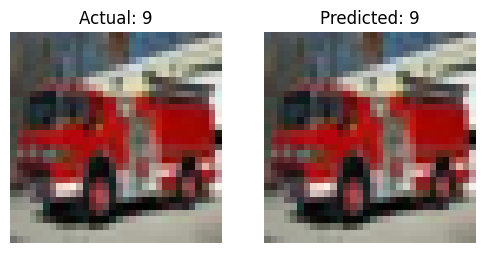

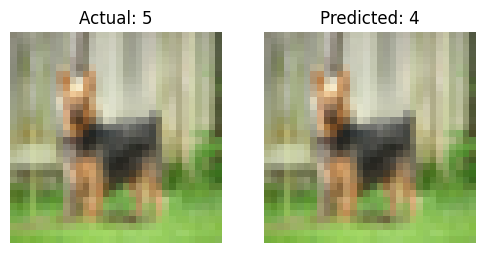

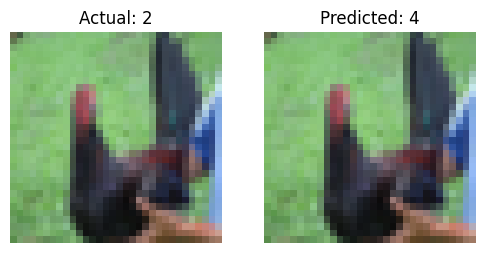

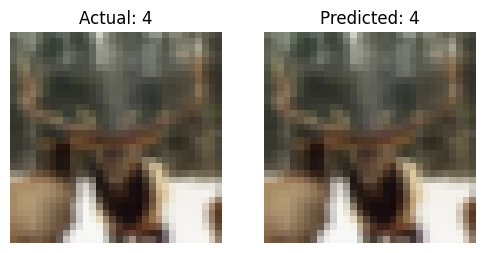

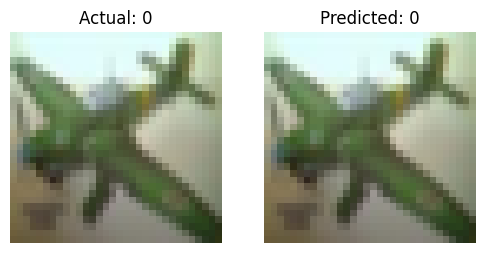

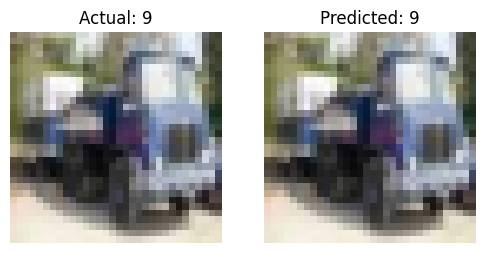

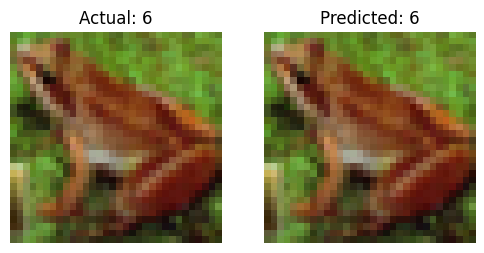

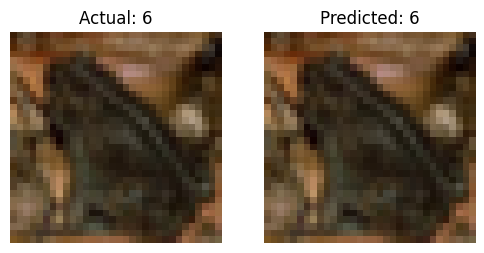

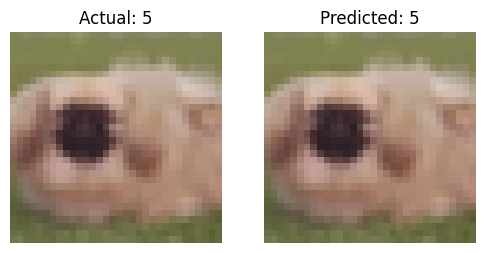

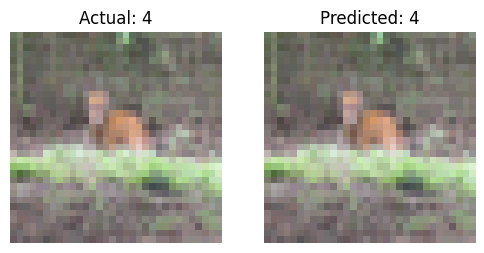

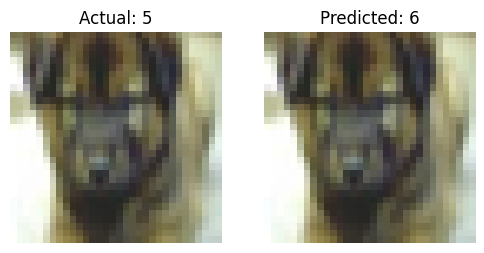

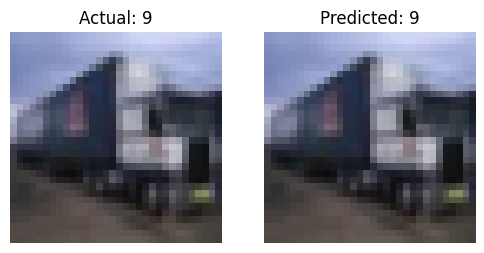

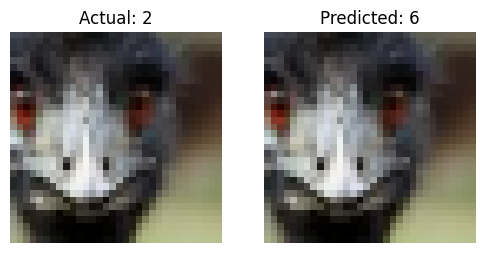

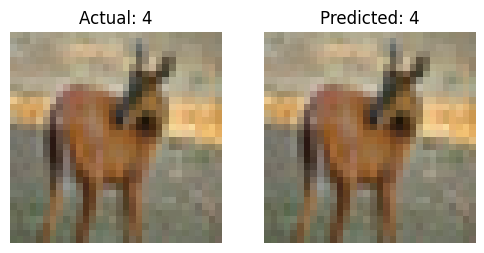

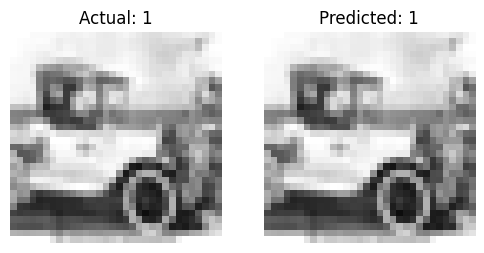

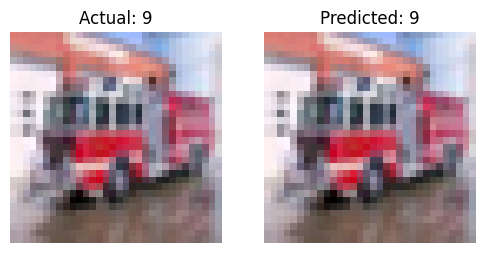

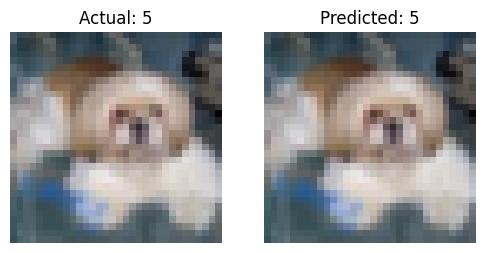

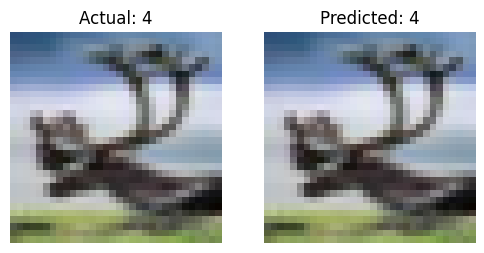

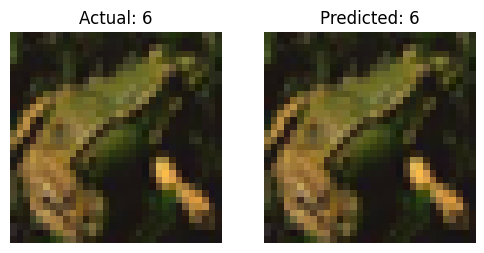

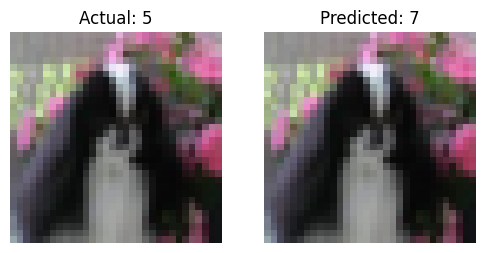

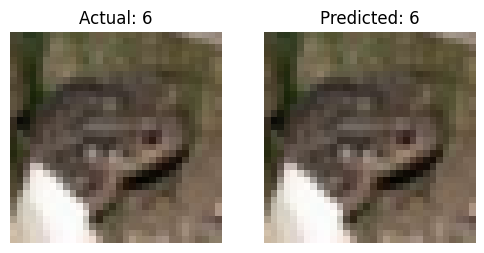

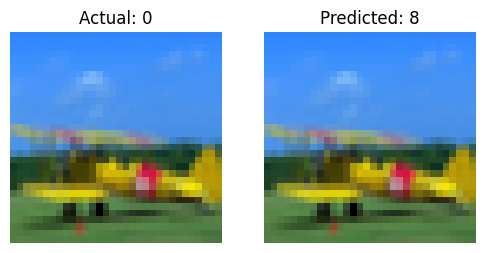

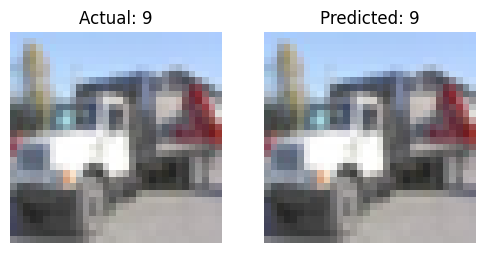

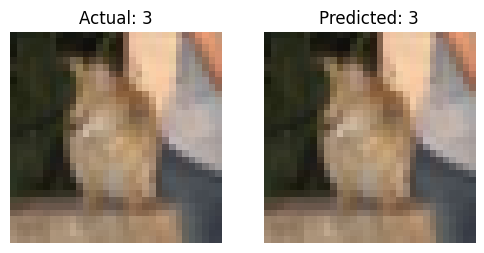

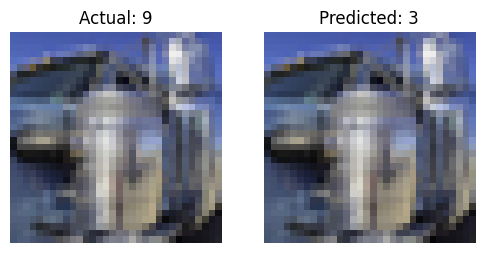

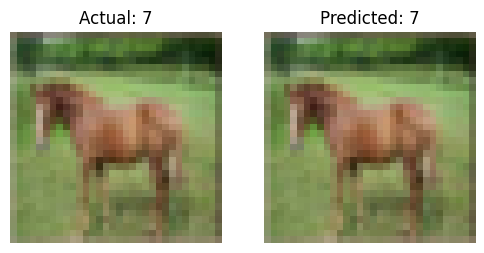

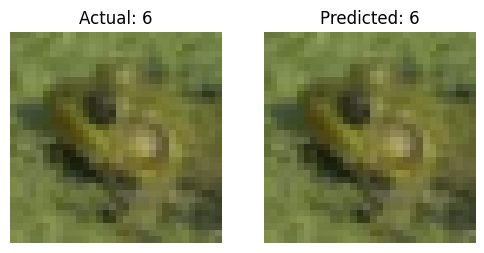

In [9]:

y_pred = model.predict(x_test)
y_pred_classes = [tf.math.argmax(element).numpy() for element in y_pred]

# Display the predicted vs actual for the first 20 images
for i in range(50):
  plt.figure(figsize=(6,3))
  plt.subplot(1, 2, 1)
  plt.imshow(x_test[i])
  plt.title(f"Actual: {y_test[i][0]}")
  plt.axis('off')

  plt.subplot(1, 2, 2)
  plt.imshow(x_test[i])
  plt.title(f"Predicted: {y_pred_classes[i]}")
  plt.axis('off')

  plt.show()


In [14]:
y_pred = model.predict(x_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[1.2574455e-09, 3.2366777e-05, 5.6057438e-08, 9.9992263e-01,
        2.2453263e-10, 4.3804321e-05, 7.8244199e-08, 3.0495702e-15,
        1.1027759e-06, 5.3276905e-10],
       [2.9576359e-09, 3.7753529e-05, 1.6237429e-15, 7.5383351e-14,
        6.4478631e-19, 4.7358046e-18, 2.2644493e-19, 1.5404196e-19,
        9.9996221e-01, 2.5592508e-08],
       [1.3302331e-04, 4.3340355e-01, 3.2038001e-06, 4.7128962e-04,
        5.6816048e-06, 8.4709363e-06, 7.6256933e-06, 8.2736384e-05,
        5.6356251e-01, 2.3220098e-03],
       [9.5879889e-01, 4.3945370e-04, 1.9979384e-04, 1.0423311e-05,
        6.0854035e-08, 3.3061099e-08, 6.0065669e-10, 7.8876106e-10,
        4.0546741e-02, 4.6009959e-06],
       [1.9695799e-11, 1.6984080e-08, 2.6693175e-04, 1.8994269e-05,
        9.4658953e-01, 9.8208625e-07, 5.3123578e-02, 1.9860728e-11,
        3.5702652e-08, 3.3271878e-11]], dtype=float32)

In [16]:
import numpy as np

In [17]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(8), np.int64(0), np.int64(4)]

In [18]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)